# Chapter 10: Scipy

## 10.1 About scipy

run **`dir(integrate)`** in python interpreter

Scipy official page: https://docs.scipy.org/doc/scipy/reference/index.html

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## 10.2 Integration by Gauss Quadrature

$$ \int_0^2 x^2 dx = \frac{8}{3} $$

In [2]:
from scipy.integrate import quad

def f1(x):
    return x**2
quad(f1,0,2)  # (integration, error)

(2.666666666666667, 2.960594732333751e-14)

## 10.3 Solving Ordinary differential Equations (ODE)

For solving first order ODE, we use the **`odeint()`** function of the `integrate` module under `scipy` package.

The general form of ODE:
$$ \frac{dx}{dt} = f(x,t) $$
To solve through module, the following steps are the followed;
1. Define the function $f(x, t)$.This means we obtain the derivative, $\frac{dx}{dt}$.
2. Create t-list by numpy for the points we want to know $x$.
3. Give initial value of $x$.
4. Use `odeint()` (imported from scipy) to find $x$. Forthe arguments, we have to give the function $\frac{dx}{dt}$, initial value of $x$ and the t-list.
5. Plot to see (via `matplotlib`).

**Example:**
$$ \frac{dx}{dt} = f(x,t) = -kx $$
(Physical example: radioacrive decay)

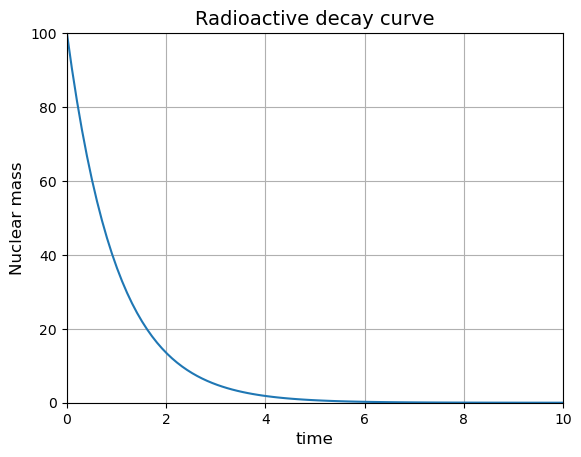

In [3]:
from scipy.integrate import odeint

k = 1  # parameter
# 1
def f(x,t):
    dxdt = -k*x
    return dxdt
# 2
t = np.linspace(0,10,100)
# 3
x0 = 100
# 4
sol = odeint(f,x0, t)
# 5
plt.plot(t, sol)
plt.axis([0,10, 0,100])
plt.title('Radioactive decay curve', fontsize=14)
plt.xlabel('time', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Nuclear mass', fontsize=12)
plt.yticks(fontsize=10)
plt.grid()
plt.show()

### 10.3.1 Second Order ODE
A second order differential equation can be split into two couple first order equations. So we have to apply the same method for the two first order equations.

**Example:** Damped harmonic motion:
$$x''+\lambda x'+kx=0; \quad x'=\frac{dx}{dt}$$

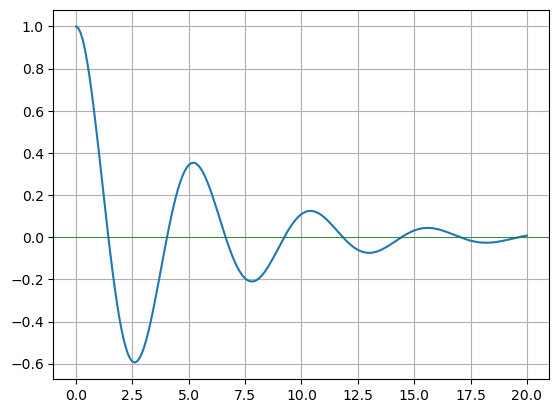

In [4]:
k, lam = 1.5, 0.4 # input values
def dhm(u, t):
    x = u[0]
    y = u[1]
    dxdt = y
    dydt = -k*x -lam*y
    return np.array([dxdt, dydt])

u0 = [1, 0]  # initial values of x and dxdt
t = np.linspace(0,20,200)
soln = odeint(dhm, u0, t)
xsol = soln[:,0]
ysol = soln[:,1]

plt.plot(t, xsol)
plt.axhline(lw=0.5, color='g')
plt.grid()
plt.show()

Exercise: Similar thing is done in the **CC 04** folder.

**Example:** Lorentz curve:

$$\frac{dx}{dt}=\sigma(y-x),\quad \frac{dy}{dt}=x(\rho-z) -y,\quad \frac{dz}{dt}=xy-\beta z$$
Lorentz used: $\sigma=10,\,\rho=28,\,\beta=\dfrac{8}{3}\,$.

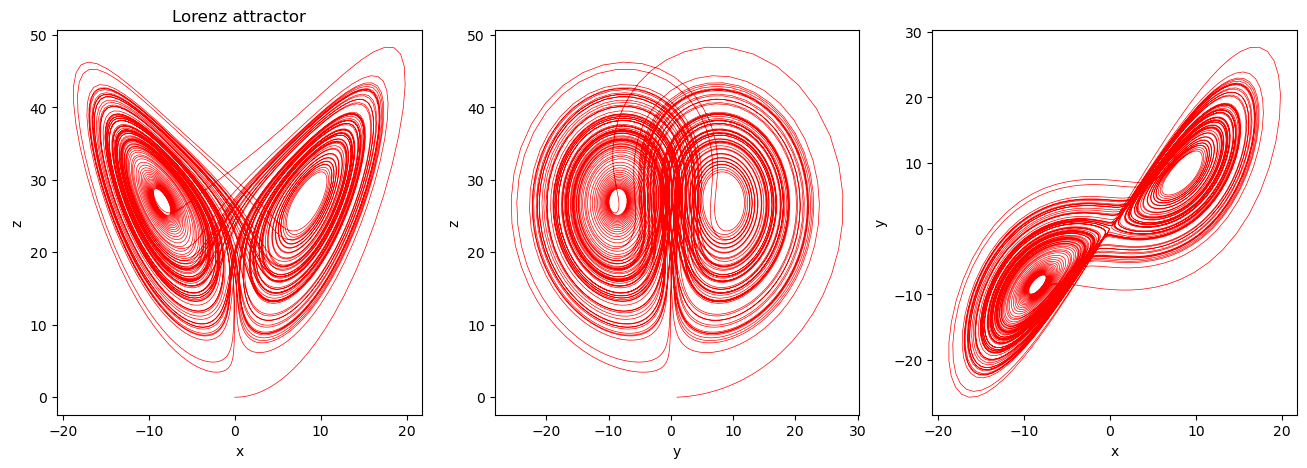

In [5]:
sig, rho, beta = 10, 28, 8/3

def lrz(u, t):
    x, y, z = u
    dxdt = sig*(y-x)
    dydt = x*(rho-z) -y
    dzdt = x*y - beta*z
    return [dxdt, dydt, dzdt]

u0 = [0, 1, 0]  # initial conditions
t = np.linspace(0, 100, 10000)

soln = odeint(lrz, u0, t)
xsol, ysol, zsol = soln[:,0], soln[:,1], soln[:,2]

plt.figure(figsize=(16,5))

plt.subplot(131)
plt.title('Lorenz attractor')
plt.plot(xsol, zsol, color='red', lw=0.5)
plt.xlabel('x')
plt.ylabel('z')

plt.subplot(132)
plt.plot(ysol, zsol, color='red', lw=0.5)
plt.xlabel('y')
plt.ylabel('z')

plt.subplot(133)
plt.plot(xsol, ysol, color='red', lw=0.5)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## 10.4 Special Functions by Scipy

## 10.5 Signal Generators

## 10.6 Lissajous Figures

## 10.7 FFT (Fast Fourier Transform)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.fftpack import fft, ifft

In [7]:
x = np.linspace(0,1,5)
y = fft(x)
x1 = ifft(y)
display('x', x, 'y=fft(x)', y, 'abs(y)', abs(y), 'ifft(y)', x1)

'x'

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

'y=fft(x)'

array([ 2.5  -0.j        , -0.625+0.8602387j , -0.625+0.20307481j,
       -0.625-0.20307481j, -0.625-0.8602387j ])

'abs(y)'

array([2.5       , 1.06331351, 0.65716389, 0.65716389, 1.06331351])

'ifft(y)'

array([0.  +0.j, 0.25+0.j, 0.5 +0.j, 0.75+0.j, 1.  +0.j])

`fft()` and `ifft()` give complex outputs. So, for plotting we need to take absolute values (`np.abs()`).

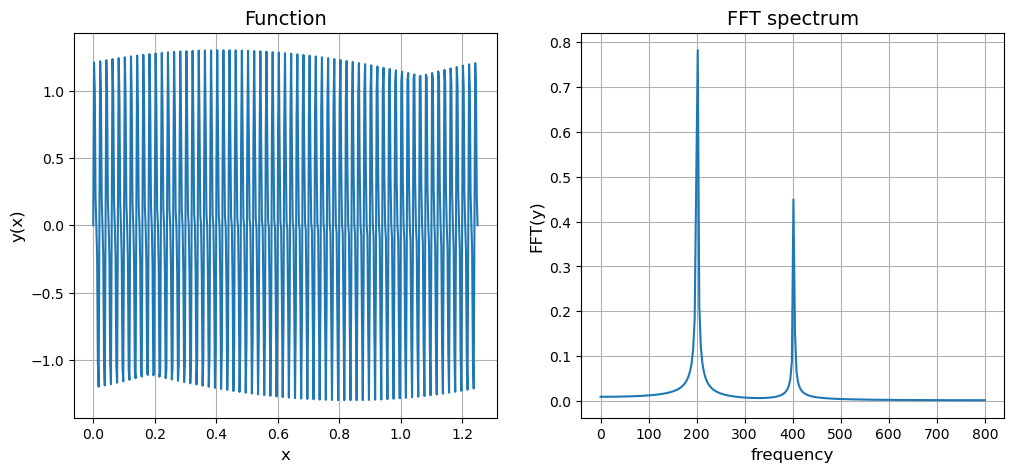

In [8]:
n = 500  # number of sample points
t = 1/400  # sample spacing
x = np.linspace(0, n*t, n)
y = np.sin(2*np.pi*50*x) + 0.5*np.sin(2*np.pi*100*x)  # function
Fy = fft(y)
freq = np.linspace(0, 2/(t), n//2)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Function', size=14)
plt.plot(x, y)
plt.xlabel('x', size=12)
plt.ylabel('y(x)', size=12)
plt.grid()

plt.subplot(1,2,2)
plt.title('FFT spectrum', size=14)
plt.plot(freq, (2/n)*np.abs(Fy)[:n//2])
plt.xlabel('frequency', size=12)
plt.ylabel('FFT(y)', size=12)
plt.grid()
plt.show()

For FFT Tutorial: https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html